# Random Variables

These concepts are foundational in data science, enabling us to quantify uncertainty and variability in data.

## Random Variables

### Discrete Random Variables

Consider a random experiment where we roll a fair six-sided die. The result is uncertain, embodying a discrete random variable, which we can denote as $X$. This variable $X$ can take one of a finite set of values, each with its own probability.

- **Example**: If $X$ represents the outcome of rolling a die, then $X \in \{1, 2, 3, 4, 5, 6\}$, with $P(X = x) = \frac{1}{6}$ for each $x \in \{1, 2, 3, 4, 5, 6\}$.

### Continuous Random Variables

In contrast, consider measuring the time it takes for the next bus to arrive, which might be any positive real number. Here, we have a continuous random variable, say $Y$, which can take any value within an interval.

- **Example**: If $Y$ denotes the time (in minutes) for the next bus to arrive, then $Y \in [0, \infty)$. Here, $Y$ could be 2.5 minutes, 3.14159 minutes, or any other positive real number.

## Distributions

The probability distribution of a random variable provides a complete description of the likelihood of various outcomes.

- For a discrete variable $X$, the **probability mass function (PMF)** gives $P(X = x)$ for each possible $x$.
- For a continuous variable $Y$, the **probability density function (PDF)**, $f_Y(y)$, is such that the probability of $Y$ falling in an interval $[a, b]$ is given by $\int_a^b f_Y(y) \, dy$.

## Expectation (Mean)

The expectation or expected value of a random variable provides a measure of the central tendency of its distribution.

- For a discrete random variable $X$, $\mathbb{E}[X] = \sum_{x} x \cdot P(X = x)$.
- For a continuous random variable $Y$, $\mathbb{E}[Y] = \int_{-\infty}^{\infty} y \cdot f_Y(y) \, dy$.

You can always think of the random variable as the "payoff" in a game, and the expectation as the average payoff in each round of the game if you play it many times.

## Variance

Variance quantifies the spread of a distribution around its mean, reflecting the variability of the random variable.

- For any random variable $X$, $\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2]$.
- This expression simplifies to $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$, a form that's often more practical for calculations.

## Covariance

Covariance provides a measure of how two random variables change together. For example, if we treat weight and height as random variables, then knowning that someone is taller than average might make it more likely that they have above-average weight.

For random variables $X$ and $Y$, the covariance is defined as $\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]$.




In [2]:
# generate list of random integers
import numpy as np

# generate list of random 1 to 6 integers (dice roll)
x = np.random.randint(1, 7, 20)
print(x)

[3 3 4 1 2 6 6 6 6 5 4 4 3 4 6 1 6 1 4 4]


## Estimating probabilities

When we don't know the probability of some event, we can estimate it by running the experiment many times and calculating the relative frequency of the event.



In [18]:
# estimating the probability of rolling a 6
# n is number of experiments
# larger n, "closer" to true probability
n = 100
x = np.random.randint(1, 7, n)
p = np.sum(x == 6) / 100
print(p)


0.14


In [20]:
# estimating the probability hitting [0, 0.5]
n = 100
x = np.random.rand(n)
p = np.sum(x < 0.5) / n
print(p)


0.51


## visualizing distrubution using histogram

/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

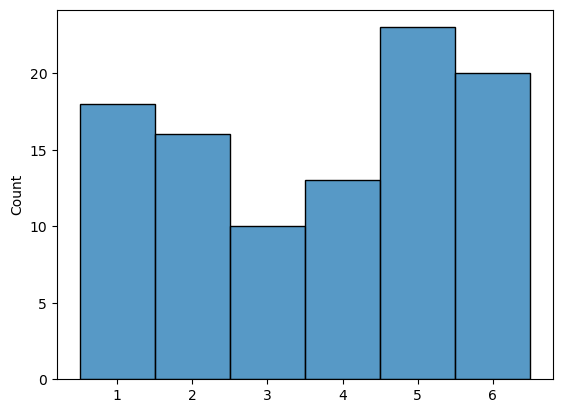

In [4]:
# for to visualize the distribution, we can use a histogram
import matplotlib.pyplot as plt
import seaborn
n = 100
x = np.random.randint(1, 7, n)
seaborn.histplot(x, discrete=True)

/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

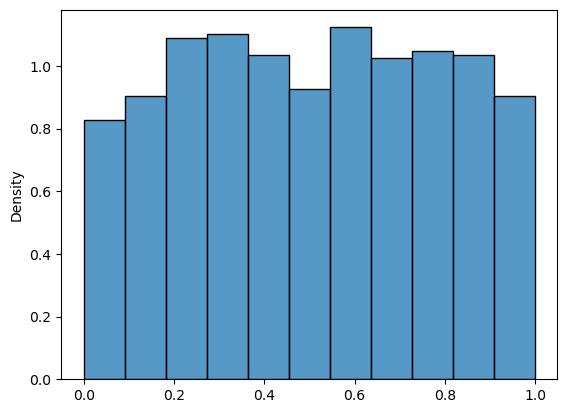

In [6]:
# generate uniform random numbers
x = np.random.rand(1000)
seaborn.histplot(x, stat='density')


/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


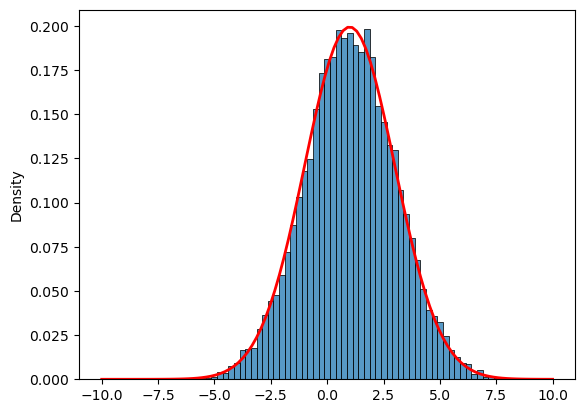

In [13]:
# gaussian normal distribution
# as n increases, the histogram looks more like the density function
mu = 1
sigma = 2
n = 1000
x  = np.random.normal(mu, sigma, n)

fig, ax = plt.subplots()
seaborn.histplot(x, stat='density', ax=ax)


x = np.linspace(-10, 10, 100)
f = (1/(sigma * np.sqrt(2 * np.pi)) *
     np.exp(- (x - mu)**2 / (2 * sigma**2)))
ax.plot(x,f,linewidth=2, color='r')

## how to estimate the E[X]
the expecttion can be estimated by the sample mean

Let $X_1, X_2, \ldots, X_n$ be a random sample of a random variable $X$. The sample mean $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ estimate $E[X]$

## Law of large numbers
The law of large numbers states that the sample mean converges to the expected value as the sample size increases.

Text(0, 0.5, 'estimated mean')

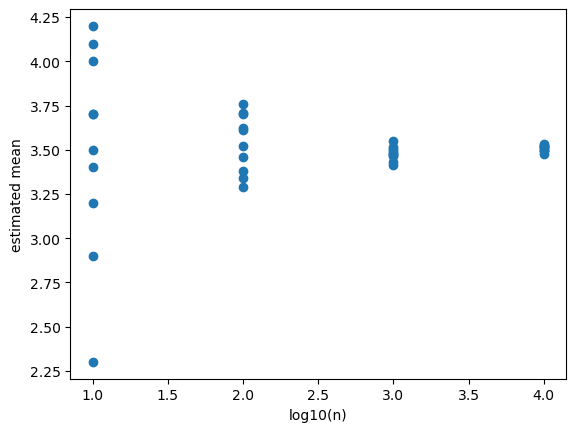

In [22]:
# In each experiment, we draw n samples and estiamte the mean
# for small n, your estimation might have large variability from experiment to experiment
# as n increases, the variability decreases
n = [10,100,1000,10000]
k = 10 # number of experiments

estiamtes = np.zeros((len(n), k))

# sample sizes
logn = []
means = []

for ni in n:
    for k in range(10):
        x = np.random.randint(1, 7, ni)
        logn.append(np.log10(ni))
        means.append(np.mean(x))

fig, ax = plt.subplots()
# scatter plot of 
ax.scatter(logn, means)
ax.set_xlabel('log10(n)')
ax.set_ylabel('estimated mean')

##  Estimation of variance

By definition the variance of a random variable X is defined as
$$ \text{Var}(X) = E[(X - E[X])^2]$$

We can estimate the variance by

$$ \hat{\sigma^2} = \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$$

We essentially replace the expected value with the sample mean. (This is one way. For "unbiased estimation", we would divide by $n-1$ instead of $n$. But for large $n$, the difference is negligible.)







In [20]:
# estimate variance of dice row
n = 100
x = np.random.randint(1, 7, n)
var1 = np.var(x)
var2 = np.mean((x - x.mean())**2)
print(var1, var2)   

2.6258999999999997 2.6258999999999997


## Central limit theorem
Roughly speaking, sample average are normally distributed for large sample sizes, regardless of the distribution of the underlying random variable! 

This explains why the normal distribution is so common.


If $X_1, X_2, \ldots, X_n$ are independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$,
if we define 
$$ Z =  \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma}$$
then for large n, Z is approximately normally distributed with mean 0 and variance 1.


/Users/Ray/opt/anaconda3/envs/torch/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-5.0, 5.0)

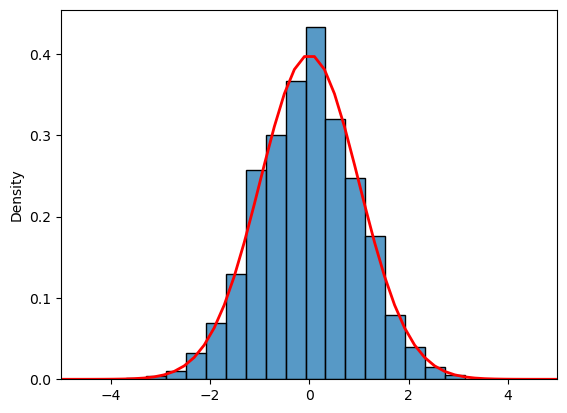

In [56]:
# we know that the coin flip has a mean of 0.5 and a variance of 0.25

# n
N = 10000

f = lambda x,mu,sigma: (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)))

n = 1000
ys = []


mu = 0.5
sigma = np.sqrt(0.25)


for i in range(N):	
	x = np.random.randint(0, 2, n)
	sample_mean = np.mean(x)
	sample_variance = np.var(x)
	y = np.sqrt(n)*(sample_mean -  mu)/np.sqrt(sample_variance)

	ys.append(y)

seaborn.histplot(ys, stat='density', bins=20)

x = np.linspace(-10, 10, 100)
fx = f(x,0,1)

plt.plot(x,fx,linewidth=2, color='r')
plt.xlim(-5,5)